In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("UpdatedStudentSurvey.xlsx")
df

,Gender,Age,Ethnicity,Religion,Parents Work,Siblings,Housing,Current GPA,Desired GPA,Absences,...,Future Planned,Career Option 1,Career Option 2,Career Option 3,Interested Career 1,Interested Career 2,Interested Career 3,Skill 1,Skill 2,Skill 3
0,Male,19,Chinese,Buddhist,Both Works,2,HDB,2.71,2.86,0,...,Not yet,Nan,Nan,Nan,Software Developer,Ai Analyst,Cybersecurity Expert,Code,Detailed,Adaptable
1,Male,21,Chinese,Buddhist,Both Works,2,HDB,0.98,1.50,6,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
2,Male,19,Chinese,Buddhist,Father Only,2,Condominium,2.86,3.30,0,...,Not yet,Nan,Nan,Nan,Entrepreneur,Food Reviewer,Food Vlogger,Innovative,Critical,Entertaining
3,Male,22,Chinese,Catholic,Both Works,2,Bungalow,3.10,4.00,7,...,Undecided,Nan,Nan,Nan,Nan,Nan,Nan,Detailed,Nan,Nan
4,Male,19,Chinese,Buddhist,Both Works,1,HDB,3.00,3.50,1,...,Undecided,Nan,Nan,Nan,Engineer,Nan,Nan,Nan,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Female,19,Indian,Islam,Both Works,2,HDB,3.45,3.60,3,...,Not yet,Nan,Nan,Nan,Teacher,Hospital Lab,Pharmacist,Precision,Laboratory Skills,Timeliness
197,Male,19,Chinese,Buddhist,Mother Only,2,HDB,2.90,3.50,0,...,Undecided,Nan,Nan,Nan,Translator,Reporter,Sports Commentator,Language,Outspoken,Confidence
198,Female,19,Chinese,Christian,Both Works,2,Condominium,2.40,3.00,1,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
199,Female,24,Chinese,Christian,Mother Only,4,HDB,1.81,2.50,0,...,Planned,Nurse,Journalist,Nan,Nan,Nan,Nan,Patience,Writing Skills,Communication Skills


In [3]:
import re

# Replace placeholder 'Nan' with actual NaN values in specific columns
columns_to_clean = ['Career Option 1', 'Career Option 2', 'Career Option 3', 
                    'Interested Career 1', 'Interested Career 2', 'Interested Career 3', 
                    'Skill 1', 'Skill 2', 'Skill 3']
df[columns_to_clean] = df[columns_to_clean].replace('Nan', pd.NA)

# Function to clean text data by removing extra spaces and trimming
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\s+', ' ', text, flags=re.MULTILINE)  # Replace multiple spaces with a single space
        return text.strip()  # Strip whitespace from the beginning and end of the text
    return text

# Apply the text cleaning function to specified columns
df[columns_to_clean] = df[columns_to_clean].applymap(clean_text)

# Aggregate and count values across multiple columns for career options
grouped_career_options = pd.concat([df['Career Option 1'], df['Career Option 2'], df['Career Option 3']]).value_counts().reset_index()
grouped_career_options.columns = ['Career Option', 'Count']

# Aggregate and count values across multiple columns for interested careers
grouped_interested_careers = pd.concat([df['Interested Career 1'], df['Interested Career 2'], df['Interested Career 3']]).value_counts().reset_index()
grouped_interested_careers.columns = ['Interested Career', 'Count']

# Aggregate and count values across multiple columns for skills
grouped_skills = pd.concat([df['Skill 1'], df['Skill 2'], df['Skill 3']]).value_counts().reset_index()
grouped_skills.columns = ['Skill', 'Count']

# Count values in individual columns for Career Options
individual_career_option_1 = df['Career Option 1'].value_counts().reset_index()
individual_career_option_1.columns = ['Career Option 1', 'Count']

individual_career_option_2 = df['Career Option 2'].value_counts().reset_index()
individual_career_option_2.columns = ['Career Option 2', 'Count']

individual_career_option_3 = df['Career Option 3'].value_counts().reset_index()
individual_career_option_3.columns = ['Career Option 3', 'Count']

# Count values in individual columns for Interested Careers
individual_interested_career_1 = df['Interested Career 1'].value_counts().reset_index()
individual_interested_career_1.columns = ['Interested Career 1', 'Count']

individual_interested_career_2 = df['Interested Career 2'].value_counts().reset_index()
individual_interested_career_2.columns = ['Interested Career 2', 'Count']

individual_interested_career_3 = df['Interested Career 3'].value_counts().reset_index()
individual_interested_career_3.columns = ['Interested Career 3', 'Count']

# Count values in individual columns for Skills
individual_skill_1 = df['Skill 1'].value_counts().reset_index()
individual_skill_1.columns = ['Skill 1', 'Count']

individual_skill_2 = df['Skill 2'].value_counts().reset_index()
individual_skill_2.columns = ['Skill 2', 'Count']

individual_skill_3 = df['Skill 3'].value_counts().reset_index()
individual_skill_3.columns = ['Skill 3', 'Count']

# Create frequency dictionaries from grouped data for easier lookup or use
grouped_career_options_dict = dict(zip(grouped_career_options['Career Option'], grouped_career_options['Count']))
grouped_interested_careers_dict = dict(zip(grouped_interested_careers['Interested Career'], grouped_interested_careers['Count']))
grouped_skills_dict = dict(zip(grouped_skills['Skill'], grouped_skills['Count']))




C:\Users\22023518\AppData\Local\Temp\ipykernel_9800\922285080.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_clean] = df[columns_to_clean].applymap(clean_text)


In [4]:
# Function to plot word cloud from frequency dictionary
def plot_word_cloud_from_dict(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    
    # Plotting
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()




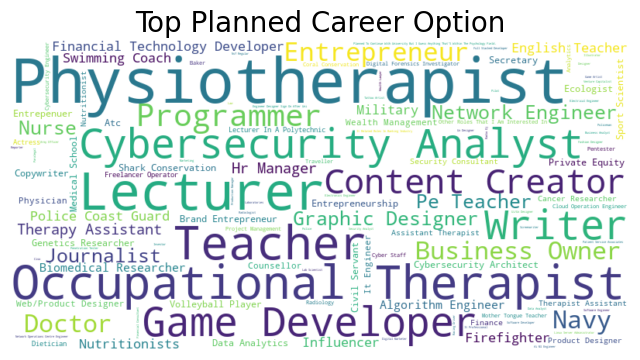

In [5]:
# Generate the word clouds with corrected handling
plot_word_cloud_from_dict(grouped_career_options_dict, 'Top Planned Career Option')

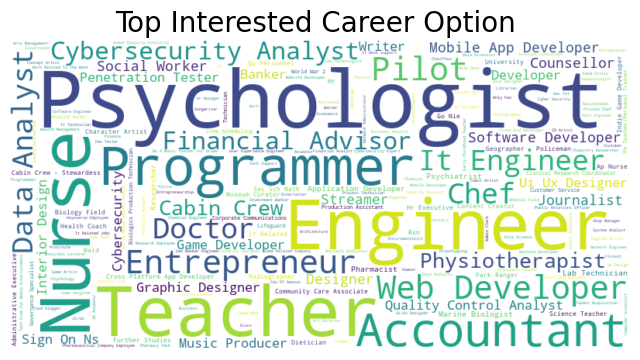

In [6]:
plot_word_cloud_from_dict(grouped_interested_careers_dict, 'Top Interested Career Option ')


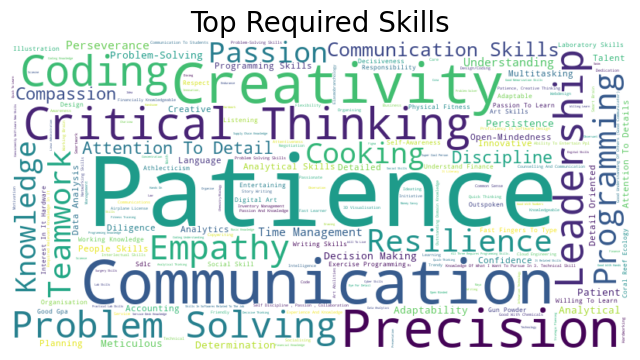

In [7]:
plot_word_cloud_from_dict(grouped_skills_dict, 'Top Required Skills')

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_bar_chart(freq_dict, title, top_n=10):
    # Convert dictionary to DataFrame for easier plotting
    df = pd.DataFrame(list(freq_dict.items()), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False).head(top_n)
    
    # Plotting
    plt.figure(figsize=(6, 6))  # Adjusted figure size for better visibility
    bars = plt.barh(df['Category'], df['Frequency'], color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequencies on top

    # Add labels to the bars
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + max(df['Frequency']) * 0.01  # Adjust the position of the label a bit right for clarity
        plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    plt.show()



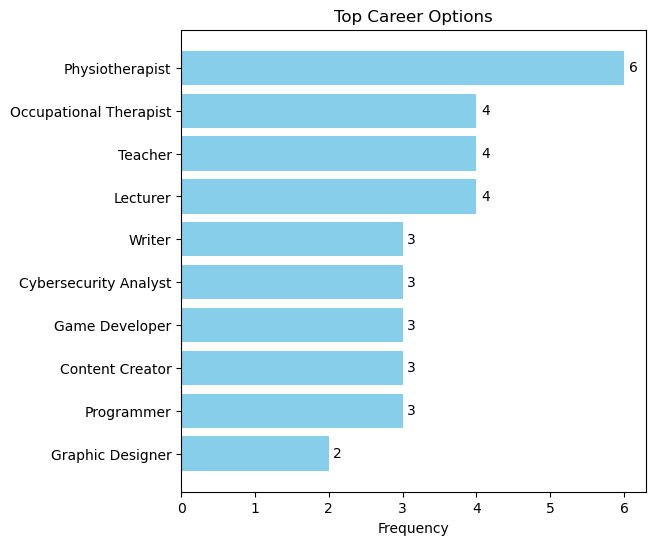

In [18]:
plot_bar_chart(grouped_career_options_dict, 'Top Career Options')

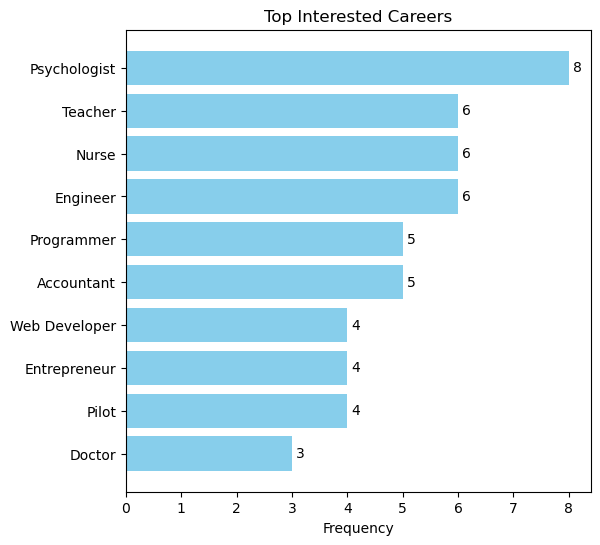

In [19]:
plot_bar_chart(grouped_interested_careers_dict, 'Top Interested Careers')

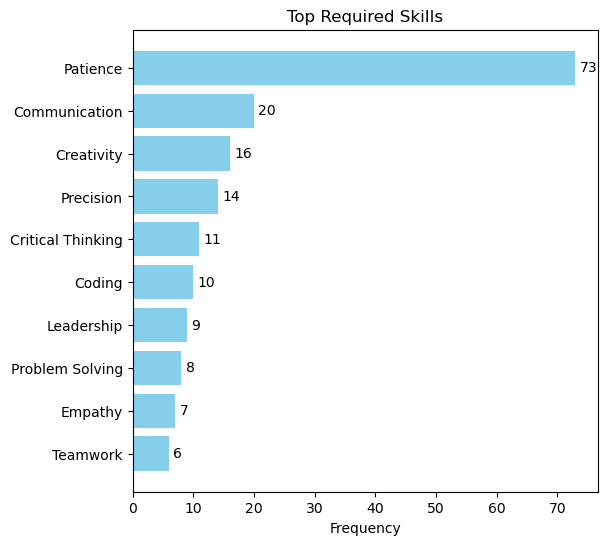

In [20]:
plot_bar_chart(grouped_skills_dict, 'Top Required Skills')